###### Feature Information

PassengerID: Unique ID number

Survived: 0 = No, 1 = Yes

Pclass: Ticket class (1, 2, or 3)

Name: Passenger name

Sex: Male or Female

Age: Age in years

SibSp: # of siblings/spouses aboard the Titanic

Parch: # of parents/children aboard the Titanic

Ticket: Ticket #

Fare: Passenger fare

Cabin: Cabin number

Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

# Imports

In [255]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import random

# Obtain

Load train & test data as dataframes from csv files

In [256]:
# Import training/testing data using pandas

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [257]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [258]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Scrub

In [259]:
# Combine train and test data into one dataframe

train_features = train.drop('Survived', axis=1)
df = pd.concat([train_features, test], axis=0, ignore_index=True)

In [260]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [261]:
df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Check data types and check for any missing values

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


One-Hot Encode 'Sex'

In [263]:
sex_dummy = pd.get_dummies(df.Sex, drop_first=True)
df = pd.concat([df, sex_dummy], axis=1)
df = df.drop('Sex', axis=1)

In [264]:
df.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
male           1309 non-null uint8
dtypes: float64(2), int64(4), object(4), uint8(1)
memory usage: 103.7+ KB


Fill 'Embarked' with most common label

In [266]:
df.Embarked.fillna('S', inplace=True)

Fill missing 'Fare' value with 0

In [267]:
df.Fare.fillna(0, inplace=True)

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
male           1309 non-null uint8
dtypes: float64(2), int64(4), object(4), uint8(1)
memory usage: 103.7+ KB


Drop 'Cabin' feature

In [269]:
df = df.drop('Cabin', axis=1)

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Embarked       1309 non-null object
male           1309 non-null uint8
dtypes: float64(2), int64(4), object(3), uint8(1)
memory usage: 93.4+ KB


Drop 'Ticket' feature

In [271]:
df = df.drop('Ticket', axis=1)

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Fare           1309 non-null float64
Embarked       1309 non-null object
male           1309 non-null uint8
dtypes: float64(2), int64(4), object(2), uint8(1)
memory usage: 83.2+ KB


Impute missing 'Age' values based on medians grouped by Pclass, male

In [273]:
grouped_df = df.groupby(by=['Pclass', 'male'], as_index=False).median()

In [274]:
grouped_df[['Pclass', 'male', 'Age']]

,Pclass,male,Age
0,1,0,36.0
1,1,1,42.0
2,2,0,28.0
3,2,1,29.5
4,3,0,22.0
5,3,1,25.0


In [275]:
def impute_age(df):
    
    df.Age.fillna(0, inplace=True)
    
    for i in range(len(df)):
        
        if 'Master' in df.iloc[i]['Name']:
            df.set_value(i, 'Age', random.randint(1,10))
        
        elif 'Master' not in df.iloc[i]['Name']:
        
            if df.iloc[i]['Pclass'] == 1 and df.iloc[i]['Age'] == 0:
                if df.iloc[i]['male'] == 0:
                    df.set_value(i, 'Age', grouped_df.iloc[0]['Age'])
                else:
                    df.set_value(i, 'Age', grouped_df.iloc[1]['Age'])

            elif df.iloc[i]['Pclass'] == 2 and df.iloc[i]['Age'] == 0:
                if df.iloc[i]['male'] == 0:
                    df.set_value(i, 'Age', grouped_df.iloc[2]['Age'])
                else:
                    df.set_value(i, 'Age', grouped_df.iloc[3]['Age'])

            elif df.iloc[i]['Pclass'] == 3 and df.iloc[i]['Age'] == 0:
                if df.iloc[i]['male'] == 0:
                    df.set_value(i, 'Age', grouped_df.iloc[4]['Age'])
                else:
                    df.set_value(i, 'Age', grouped_df.iloc[5]['Age'])

impute_age(df)

C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release

Combine SibSp and Parch into one feature called 'Family'

In [276]:
df['family'] = df['SibSp'] + df['Parch']
df.drop(['SibSp', 'Parch'], inplace=True, axis=1)

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Age            1309 non-null float64
Fare           1309 non-null float64
Embarked       1309 non-null object
male           1309 non-null uint8
family         1309 non-null int64
dtypes: float64(2), int64(3), object(2), uint8(1)
memory usage: 73.0+ KB


In [278]:
df.Age.value_counts()

25.00    170
22.00    107
24.00     47
42.00     46
36.00     42
        ... 
23.50      1
0.17       1
20.50      1
14.50      1
0.92       1
Name: Age, Length: 94, dtype: int64

Extract title from names

In [279]:
def title_from_name(df):
    df['title'] = None
    
    for i in range(len(df)):
        
        if 'Mr.' in df.iloc[i]['Name']:
            df.set_value(i, 'title', 'Mr')
        elif 'Mrs.' in df.iloc[i]['Name']:
            df.set_value(i, 'title', 'Mrs')
        elif 'Miss' in df.iloc[i]['Name']:
            df.set_value(i, 'title', 'Miss')
        elif 'Master' in df.iloc[i]['Name']:
            df.set_value(i, 'title', 'Master')
        elif 'Rev.' in df.iloc[i]['Name']:
            df.set_value(i, 'title', 'Rev')
        else:
            df.set_value(i, 'title', 'Other')
            
title_from_name(df)

C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\dougl\Anaconda3\envs\learn-env\lib\site

In [280]:
df.title.value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
Other      26
Rev         8
Name: title, dtype: int64

In [281]:
train_data = pd.concat([df[:len(train)], train.Survived], axis=1)

In [282]:
train_data['Died'] = 1 - train['Survived']

In [283]:
train_data

,PassengerId,Pclass,Name,Age,Fare,Embarked,male,family,title,Survived,Died
0,1,3,"Braund, Mr. Owen Harris",22.0,7.2500,S,1,1,Mr,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833,C,0,1,Mrs,1,0
2,3,3,"Heikkinen, Miss. Laina",26.0,7.9250,S,0,0,Miss,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000,S,0,1,Mrs,1,0
4,5,3,"Allen, Mr. William Henry",35.0,8.0500,S,1,0,Mr,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",27.0,13.0000,S,1,0,Rev,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.0,30.0000,S,0,0,Miss,1,0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",22.0,23.4500,S,0,3,Miss,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,30.0000,C,1,0,Mr,1,0


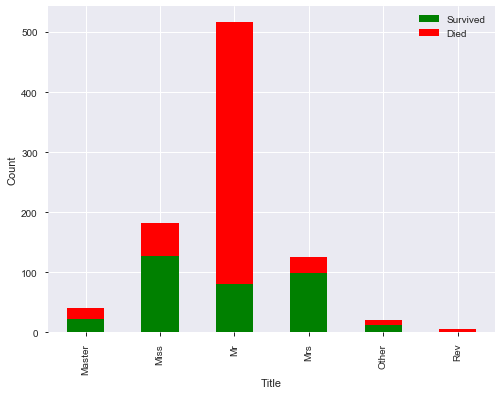

In [284]:
ax = train_data.groupby('title').agg('sum')[['Survived', 'Died']].plot(
    kind='bar', figsize=(8,6), stacked=True, color=['g', 'r'])
ax.set_xlabel('Title')
ax.set_ylabel('Count');

# Explore

In [216]:
train_data.head()

,PassengerId,Pclass,Name,Age,Fare,Embarked,male,family,Survived,Died
0,1,3,"Braund, Mr. Owen Harris",22.0,7.2500,S,1,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833,C,0,1,1,0
2,3,3,"Heikkinen, Miss. Laina",26.0,7.9250,S,0,0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000,S,0,1,1,0
4,5,3,"Allen, Mr. William Henry",35.0,8.0500,S,1,0,0,1


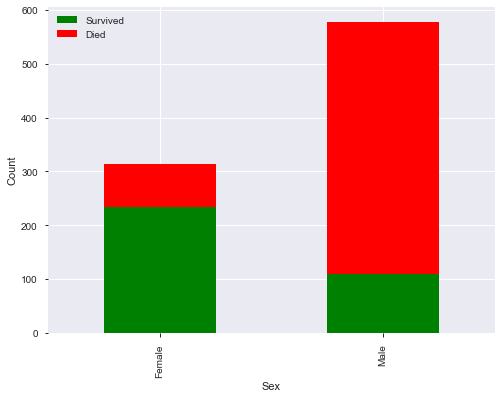

In [217]:
ax = train_data.groupby('male').agg('sum')[['Survived', 'Died']].plot(
    kind='bar', figsize=(8,6), stacked=True, color=['g', 'r'])
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_xticklabels(['Female', 'Male']);

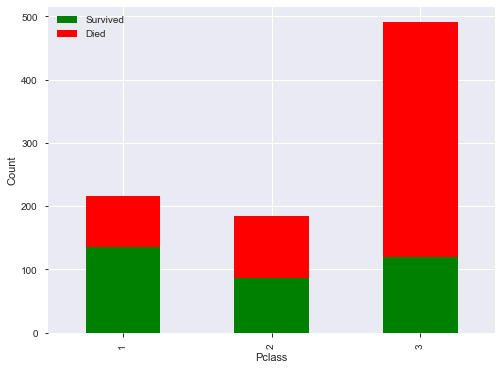

In [218]:
ax = train_data.groupby('Pclass').agg('sum')[['Survived', 'Died']].plot(
    kind='bar', figsize=(8,6), stacked=True, color=['g', 'r'])
ax.set_xlabel('Pclass')
ax.set_ylabel('Count')
ax.set_xticklabels(['1', '2', '3']);

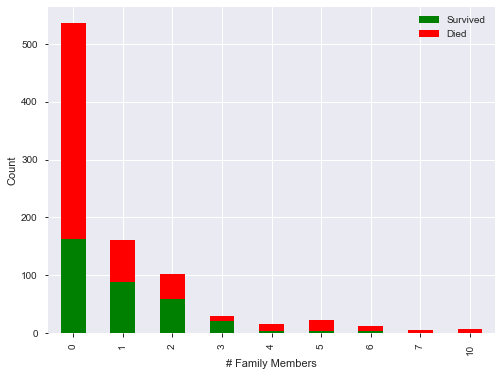

In [219]:
ax = train_data.groupby('family').agg('sum')[['Survived', 'Died']].plot(
    kind='bar', figsize=(8,6), stacked=True, color=['g', 'r'])
ax.set_xlabel('# Family Members')
ax.set_ylabel('Count');

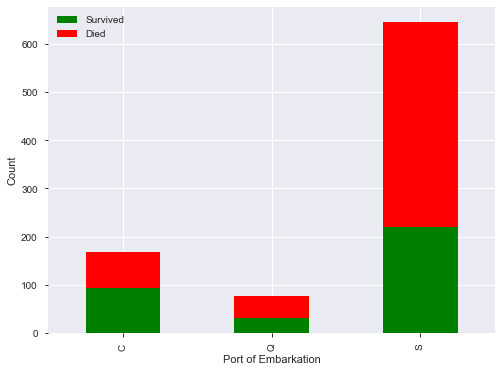

In [220]:
ax = train_data.groupby('Embarked').agg('sum')[['Survived', 'Died']].plot(
    kind='bar', figsize=(8,6), stacked=True, color=['g', 'r'])
ax.set_xlabel('Port of Embarkation')
ax.set_ylabel('Count');

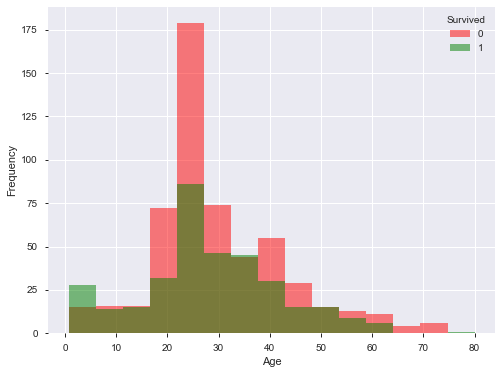

In [221]:
ax = train_data.pivot(columns='Survived', values='Age').plot.hist(bins=15, 
                                                                  alpha=0.5,
                                                                 color=['r', 'g'],
                                                                 figsize=(8,6))
ax.set_xlabel('Age');

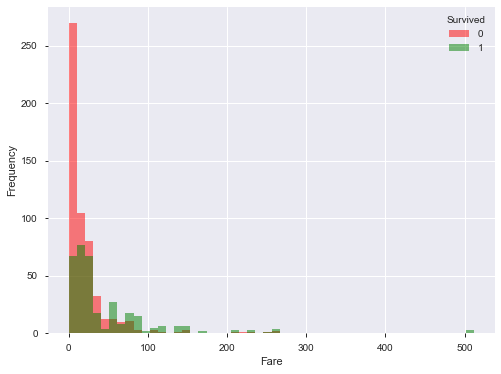

In [222]:
ax = train_data.pivot(columns='Survived', values='Fare').plot.hist(bins=50, 
                                                                  alpha=0.5,
                                                                 color=['r', 'g'],
                                                                 figsize=(8,6))
ax.set_xlabel('Fare');

# Feature Engineering

In [37]:
df.head()

,PassengerId,Pclass,Name,Age,Fare,Embarked,male,family,title
0,1,3,"Braund, Mr. Owen Harris",22.0,7.2500,S,1,1,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833,C,0,1,Mrs
2,3,3,"Heikkinen, Miss. Laina",26.0,7.9250,S,0,0,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000,S,0,1,Mrs
4,5,3,"Allen, Mr. William Henry",35.0,8.0500,S,1,0,Mr


In [38]:
df = df.drop(['Name'], axis=1)

In [39]:
df.head()

,PassengerId,Pclass,Age,Fare,Embarked,male,family,title
0,1,3,22.0,7.2500,S,1,1,Mr
1,2,1,38.0,71.2833,C,0,1,Mrs
2,3,3,26.0,7.9250,S,0,0,Miss
3,4,1,35.0,53.1000,S,0,1,Mrs
4,5,3,35.0,8.0500,S,1,0,Mr


In [40]:
e_dummies = pd.get_dummies(df.Embarked, prefix='emb')
df = pd.concat([df, e_dummies], axis=1)
df = df.drop('Embarked', axis=1)

In [41]:
df.head()

,PassengerId,Pclass,Age,Fare,male,family,title,emb_C,emb_Q,emb_S
0,1,3,22.0,7.2500,1,1,Mr,0,0,1
1,2,1,38.0,71.2833,0,1,Mrs,1,0,0
2,3,3,26.0,7.9250,0,0,Miss,0,0,1
3,4,1,35.0,53.1000,0,1,Mrs,0,0,1
4,5,3,35.0,8.0500,1,0,Mr,0,0,1


In [42]:
t_dummies = pd.get_dummies(df.title, prefix='title')
df = pd.concat([df, t_dummies], axis=1)
df = df.drop('title', axis=1)

In [43]:
df.head()

,PassengerId,Pclass,Age,Fare,male,family,emb_C,emb_Q,emb_S,title_Master,title_Miss,title_Mr,title_Mrs,title_Other,title_Rev
0,1,3,22.0,7.2500,1,1,0,0,1,0,0,1,0,0,0
1,2,1,38.0,71.2833,0,1,1,0,0,0,0,0,1,0,0
2,3,3,26.0,7.9250,0,0,0,0,1,0,1,0,0,0,0
3,4,1,35.0,53.1000,0,1,0,0,1,0,0,0,1,0,0
4,5,3,35.0,8.0500,1,0,0,0,1,0,0,1,0,0,0


In [94]:
X = df[:len(train)]
y = train.Survived

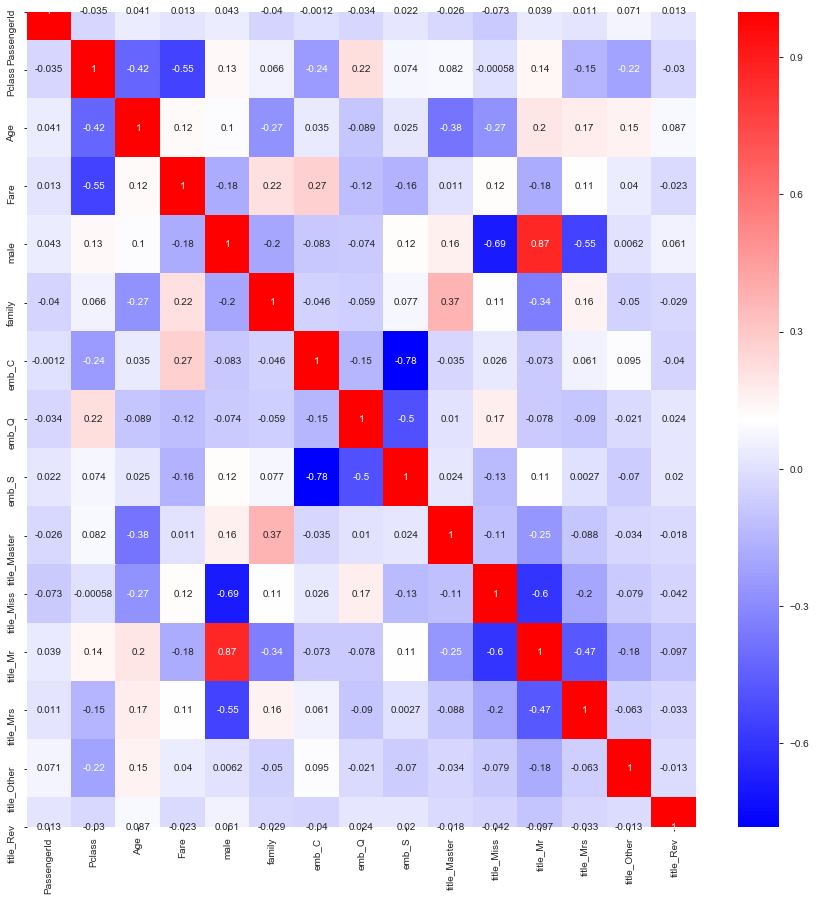

In [95]:
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(), annot=True, cmap='bwr');

# Modeling

## Gender Predictor

In [96]:
gender_pred = 1 - X.male

In [97]:
gender_acc = round(accuracy_score(y, gender_pred), 2)

print(f'Gender Predictor Accuracy: {gender_acc}')

Gender Predictor Accuracy: 0.79


## Naive Bayes Classifier

In [98]:
train_acc = []
test_acc = []

for i in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                       random_state=i)

    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred_train = gnb.predict(X_train)
    y_pred_test = gnb.predict(X_test)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))

GNB Mean Train Accuracy: 0.79
GNB Mean Test Accuracy: 0.79


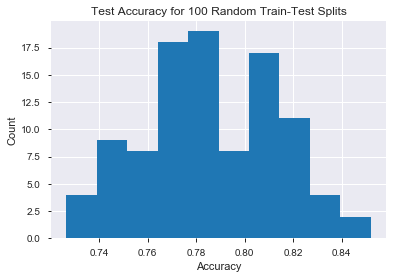

In [99]:
print(f'GNB Mean Train Accuracy: {round(np.mean(train_acc),2)}')
print(f'GNB Mean Test Accuracy: {round(np.mean(test_acc),2)}')

plt.hist(test_acc)
plt.xlabel('Accuracy')
plt.ylabel('Count')
plt.title('Test Accuracy for 100 Random Train-Test Splits')
plt.show();

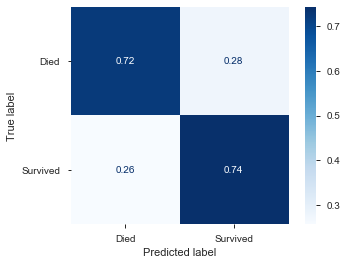

In [100]:
plot_confusion_matrix(gnb, X_test, y_test, normalize='true',
                      display_labels=['Died', 'Survived'],
                     cmap='Blues')
plt.grid()

## Logistic Regression Classifier

In [101]:
train_acc = []
test_acc = []

for i in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                       random_state=i)

    lr = LogisticRegression(penalty='none', max_iter=10000)
    lr.fit(X_train, y_train)
    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))

Log Reg Mean Train Accuracy: 0.83
Log Reg Mean Test Accuracy: 0.83


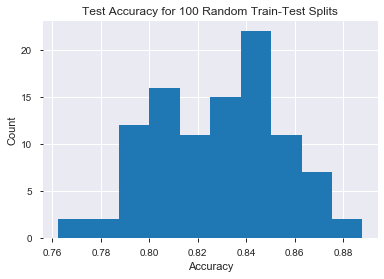

In [102]:
print(f'Log Reg Mean Train Accuracy: {round(np.mean(train_acc),2)}')
print(f'Log Reg Mean Test Accuracy: {round(np.mean(test_acc),2)}')

plt.hist(test_acc)
plt.xlabel('Accuracy')
plt.ylabel('Count')
plt.title('Test Accuracy for 100 Random Train-Test Splits')
plt.show();

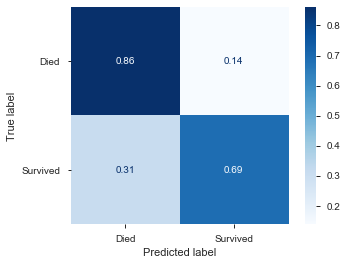

In [103]:
plot_confusion_matrix(lr, X_test, y_test, normalize='true', 
                      display_labels=['Died', 'Survived'],
                     cmap='Blues')
plt.grid()

## Decision Tree Classifier

In [104]:
train_acc = []
test_acc = []

for i in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                       random_state=i)

    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    y_pred_train = dt.predict(X_train)
    y_pred_test = dt.predict(X_test)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))

Decision Tree Mean Train Accuracy: 1.0
Decision Tree Mean Test Accuracy: 0.76


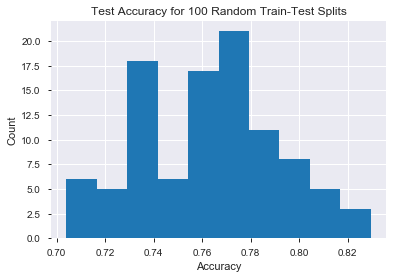

In [105]:
print(f'Decision Tree Mean Train Accuracy: {round(np.mean(train_acc),2)}')
print(f'Decision Tree Mean Test Accuracy: {round(np.mean(test_acc),2)}')

plt.hist(test_acc)
plt.xlabel('Accuracy')
plt.ylabel('Count')
plt.title('Test Accuracy for 100 Random Train-Test Splits')
plt.show();

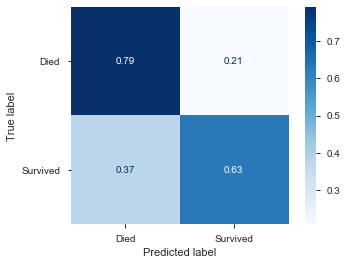

In [106]:
plot_confusion_matrix(dt, X_test, y_test, normalize='true', 
                      display_labels=['Died', 'Survived'],
                     cmap='Blues')
plt.grid()

## Random Forest Classifier

In [107]:
train_acc = []
test_acc = []

for i in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                       random_state=i)

    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    y_pred_train = rf.predict(X_train)
    y_pred_test = rf.predict(X_test)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))

Random Forest Mean Train Accuracy: 1.0
Random Forest Mean Test Accuracy: 0.82


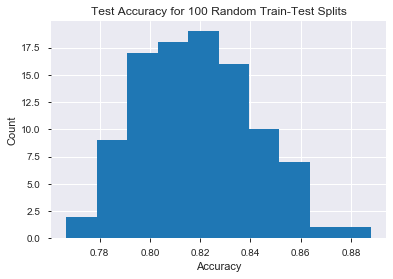

In [108]:
print(f'Random Forest Mean Train Accuracy: {round(np.mean(train_acc),2)}')
print(f'Random Forest Mean Test Accuracy: {round(np.mean(test_acc),2)}')

plt.hist(test_acc)
plt.xlabel('Accuracy')
plt.ylabel('Count')
plt.title('Test Accuracy for 100 Random Train-Test Splits')
plt.show();

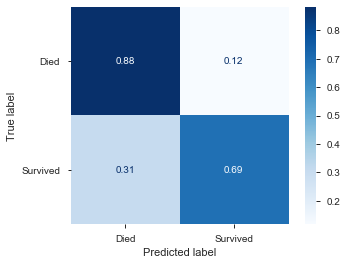

In [109]:
plot_confusion_matrix(rf, X_test, y_test, normalize='true', 
                      display_labels=['Died', 'Survived'],
                     cmap='Blues')
plt.grid()

## AdaBoost Classifier

In [110]:
train_acc = []
test_acc = []

for i in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                       random_state=i)

    ada = AdaBoostClassifier()
    ada.fit(X_train, y_train)
    y_pred_train = ada.predict(X_train)
    y_pred_test = ada.predict(X_test)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))

AdaBoost Mean Train Accuracy: 0.85
AdaBoost Forest Mean Test Accuracy: 0.81


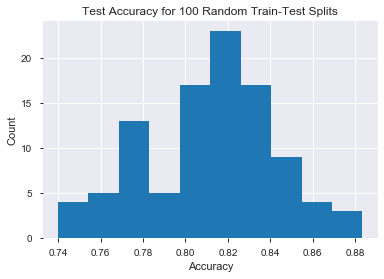

In [111]:
print(f'AdaBoost Mean Train Accuracy: {round(np.mean(train_acc),2)}')
print(f'AdaBoost Forest Mean Test Accuracy: {round(np.mean(test_acc),2)}')

plt.hist(test_acc)
plt.xlabel('Accuracy')
plt.ylabel('Count')
plt.title('Test Accuracy for 100 Random Train-Test Splits')
plt.show();

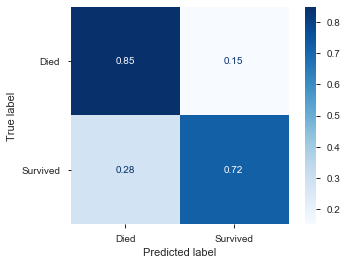

In [112]:
plot_confusion_matrix(ada, X_test, y_test, normalize='true', 
                      display_labels=['Died', 'Survived'],
                     cmap='Blues')
plt.grid()

## Decision Tree Grid Search

In [149]:
dt = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': [None, 3, 5, 10],
             'min_samples_leaf': [1, 2, 3, 5, 10],
             'max_features': [None, 0.8, 0.5],
             'min_samples_split': [2, 3, 4]}
grid_search = GridSearchCV(dt, param_grid, scoring='accuracy', cv=5, verbose=1)

In [150]:
grid_search.fit(X,y)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:   18.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [151]:
dt_best_params = grid_search.best_params_
print(dt_best_params)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 0.5, 'min_samples_leaf': 3, 'min_samples_split': 4}


In [152]:
train_acc = []
test_acc = []

for i in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                       random_state=i)

    dt = DecisionTreeClassifier(**dt_best_params)
    dt.fit(X_train, y_train)
    y_pred_train = dt.predict(X_train)
    y_pred_test = dt.predict(X_test)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))

Decision Tree Mean Train Accuracy: 0.84
Decision Tree Mean Test Accuracy: 0.81


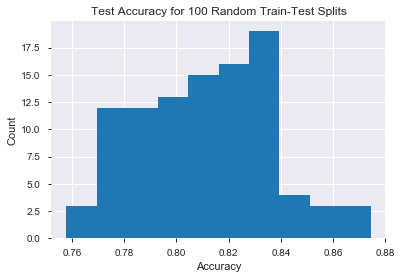

In [153]:
print(f'Decision Tree Mean Train Accuracy: {round(np.mean(train_acc),2)}')
print(f'Decision Tree Mean Test Accuracy: {round(np.mean(test_acc),2)}')

plt.hist(test_acc)
plt.xlabel('Accuracy')
plt.ylabel('Count')
plt.title('Test Accuracy for 100 Random Train-Test Splits')
plt.show();

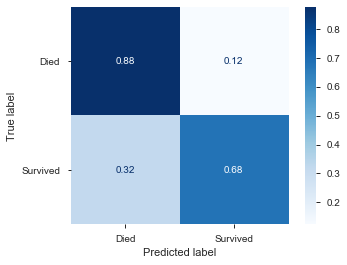

In [154]:
plot_confusion_matrix(dt, X_test, y_test, normalize='true', 
                      display_labels=['Died', 'Survived'],
                     cmap='Blues')
plt.grid()

## Random Forest Grid Search

In [155]:
rf = RandomForestClassifier()
param_grid = {}
grid_search = GridSearchCV(rf, param_grid, scoring='accuracy', cv=5, verbose=1)

In [156]:
grid_search.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   26.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [157]:
rf_best_params = grid_search.best_params_
print(rf_best_params)

{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 50}


In [158]:
train_acc = []
test_acc = []

for i in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                       random_state=i)

    rf = RandomForestClassifier(**rf_best_params)
    rf.fit(X_train, y_train)
    y_pred_train = rf.predict(X_train)
    y_pred_test = rf.predict(X_test)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))

Random Forest Mean Train Accuracy: 1.0
Random Forest Mean Test Accuracy: 0.82


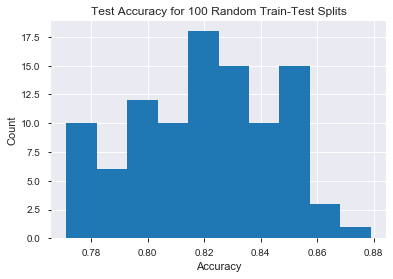

In [159]:
print(f'Random Forest Mean Train Accuracy: {round(np.mean(train_acc),2)}')
print(f'Random Forest Mean Test Accuracy: {round(np.mean(test_acc),2)}')

plt.hist(test_acc)
plt.xlabel('Accuracy')
plt.ylabel('Count')
plt.title('Test Accuracy for 100 Random Train-Test Splits')
plt.show();

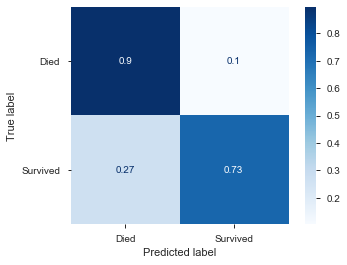

In [160]:
plot_confusion_matrix(rf, X_test, y_test, normalize='true', 
                      display_labels=['Died', 'Survived'],
                     cmap='Blues')
plt.grid()

# Submission

In [184]:
test = df[len(train):]

In [185]:
sub_df = pd.DataFrame([])
sub_df['PassengerID'] = test.PassengerId
sub_df['Survived'] = rf.predict(test)

In [186]:
sub_df

,PassengerID,Survived
891,892,0
892,893,1
893,894,0
894,895,0
895,896,1
...,...,...
1304,1305,0
1305,1306,1
1306,1307,0
1307,1308,0


In [187]:
sub_df.to_csv('sub_8-21-3.csv')